# Does coffee make me stressed?

I drink coffee every day in amounts that feel like a lot.  I was curious whether this increased stress, or at least measurable physical responses associated to stress.  [One study by researchers at Duke University Medical Center](http://corporate.dukemedicine.org/news_and_publications/news_office/news/5687) found that caffeine consumption lead to increased feelings of stress and responses in the body, such as increased blood pressure and heart rate, that are related to stress.  I wanted to see how my body responds to the coffee I drink.  The Duke study compared feelings of stress and the body's response on days where participants drank no caffeine and on days when they consumed a specific amount of caffeine. As it's unlikely that I will stop drinking coffee altogether, I chose to explore whether my body's responses to stress was higher on days when I consumed the most coffee.  The study also used a caffeine pill.  I wanted to base my exploration on the way that I actually drink coffee.


## Hypothesis

On days when I drink more coffee, my average resting heart rate will be higher.

## Process

Every day, I recorded the amount of coffee, in ounces, and the time that I drank coffee.  If I consumed multiple consecutive cups of coffee, I only made one record of the total amount of coffee. 

I used a [Garmin vivosmart HR](https://buy.garmin.com/en-US/US/into-sports/health-fitness/vivosmart-hr/prod531166.html) activity tracker to automatically record my heart rate throughout the day.

![Photo of Garmin vivosmart HR](https://static.garmincdn.com/en/products/010-01955-00/g/cf-lg.jpg)

I wrote a [computer program](https://github.com/ghing/coffee-science-fair-data) to select just the heart rate readings from the activity monitor and fed the data into this notebook for analysis.

### Potential data collection errors

Different roasts of coffee can contain different amounts of caffeine, so the same amount of coffee might have different amounts of caffeine.  For the most control, I should drink the same roast of coffee, brewed in the same way throughout my study.     

While it was easy to know the amount of coffee contained in my usual reusable mug and in store-bought cups of coffee, different ceramic mugs that I used vary in size.  I approximated these mugs as all containing 12 ounces, the volume of a few mugs that I measured.  Always using the same mug would have made my measurement more precise.

Often, I drank the coffee somewhat slowly.  I only recorded one time for each coffee, somewhere in the middle of drinking the cup of coffee.  It would have been better to record the start and finish times of the cup of coffee.  However, as it can take hours for coffee to be completely metabolised, this might not be a big source of error.

The activity tracker eventually runs out of battery and needs to be recharged.  During this period, it isn't taking heart rate readings.  I didn't keep careful track of when I was charging the device.  I should have recorded this and thrown out data from days when I wasn't wearing the device. 

Garmin Connect, the service that the device syncs with allows you to download the raw FIT files from the device.  However, the time format for the heart rate readings can be a little tricky.  I wasn't able to figure out how to correctly calculate this for all readings, so I used explicit time information from sensor readings around when the heart rate reading was taken.  Since I am taking the average of readings for the entire day, this shouldn't cause too much error.  However, I would want to figure out how to get the exact time of the heart rate reading if I wanted to look at heart rate based on time from when I drank the coffee.



## Load the coffee data

In [1]:
import datetime
import re

import pandas as pd

COFFEE_CONSUMPTION_DATA_PATH = os.environ.get('COFFEE_CONSUMPTION_DATA_PATH',
    os.path.join(os.getcwd(), 'Coffee.xlsx'))
COFFEE_CONSUMPTION_DATA_SHEET = 'coffee_consumption'

def parse_amount(val):
    without_oz = re.sub(r'\s*oz', '', val)
    return int(without_oz)

converters = {
    'amount': parse_amount,
    'date': lambda x: x.date()
}

coffee_consumption = pd.read_excel(COFFEE_CONSUMPTION_DATA_PATH,
    sheetname=COFFEE_CONSUMPTION_DATA_SHEET,
    # Skip the last `notes` column
    parse_cols=2,
    converters=converters)
coffee_consumption

,date,time,amount
0,2016-03-13,10:00:00,16
1,2016-03-13,16:45:00,16
2,2016-03-14,09:00:00,12
3,2016-03-14,10:00:00,8
4,2016-03-14,11:00:00,12
5,2016-03-15,08:30:00,12
6,2016-03-15,09:30:00,12
7,2016-03-15,15:30:00,12
8,2016-03-16,09:30:00,12
9,2016-03-16,12:27:00,12


## Load heart rate data

In [2]:
import datetime
import os

import pandas as pd

HEART_RATE_DATA_PATH = os.environ.get('HEART_RATE_DATA_PATH',
    os.path.join(os.getcwd(), 'heart_rate.csv'))

converters = {
    'date': lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date(),
    'time': lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time(),
}
heart_rate = pd.read_csv(HEART_RATE_DATA_PATH, converters=converters)
heart_rate

,date,time,heart_rate
0,2016-03-13,09:07:00,0
1,2016-03-13,09:07:00,69
2,2016-03-13,09:11:00,93
3,2016-03-13,15:29:00,88
4,2016-03-13,15:42:00,88
5,2016-03-13,15:50:00,89
6,2016-03-13,15:50:00,89
7,2016-03-13,15:50:00,89
8,2016-03-13,16:26:00,87
9,2016-03-13,16:43:00,98


## Dedupe heart rate readings with the same timestamp

I had to hack around the weird timestamp format in the FIT files so there are some readings that have the same timestamp.  Just average them.

In [3]:
heart_rate_by_time = heart_rate.groupby(['date', 'time'], axis=0).mean()

rows = []
for idx, val in heart_rate_by_time.iterrows():
    date, time = idx
    heart_rate = val['heart_rate']
    # While we're at it, let's drop values with erroneously low heart rates
    if heart_rate < 20:
        continue
        
    rows.append({
        'date': date,
        'time': time,
        'heart_rate': heart_rate,
    })

heart_rate = pd.DataFrame(rows)
heart_rate

,date,heart_rate,time
0,2016-03-13,34.500000,09:07:00
1,2016-03-13,93.000000,09:11:00
2,2016-03-13,88.000000,15:29:00
3,2016-03-13,88.000000,15:42:00
4,2016-03-13,89.000000,15:50:00
5,2016-03-13,87.000000,16:26:00
6,2016-03-13,98.000000,16:43:00
7,2016-03-13,104.888889,16:46:00
8,2016-03-13,98.000000,17:50:00
9,2016-03-13,98.750000,18:07:00


<IPython.core.display.Javascript object>


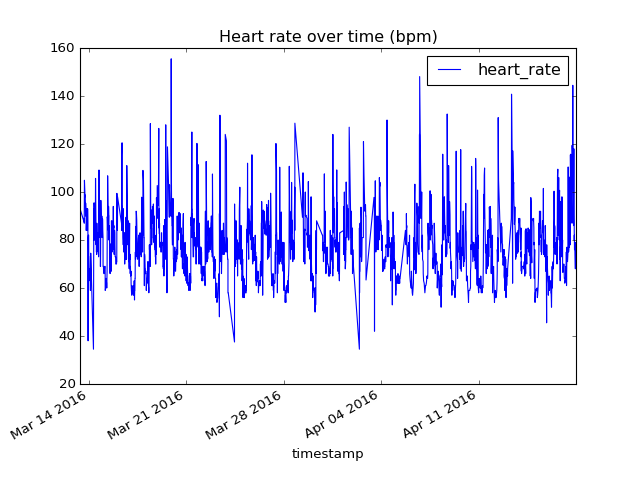

In [4]:
%matplotlib notebook

import datetime

heart_rate['timestamp'] = heart_rate[['date', 'time']].apply(lambda x: datetime.datetime.combine(date=x[0], time=x[1]), axis=1)
heart_rate.plot(kind='line', x='timestamp', y='heart_rate', title="Heart rate over time (bpm)")

<IPython.core.display.Javascript object>


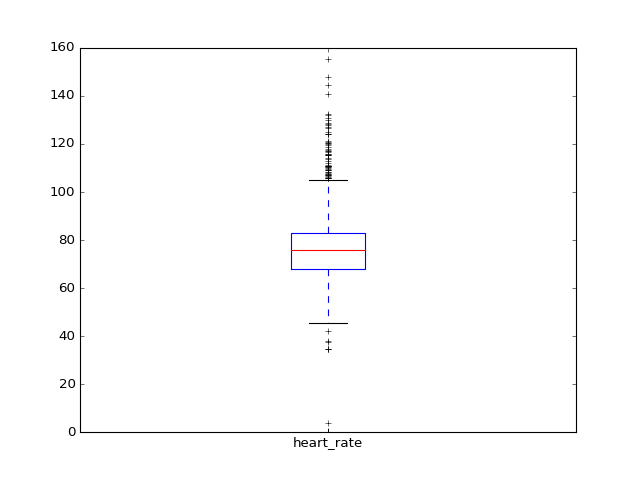

In [16]:
heart_rate_by_time.plot(kind='box')

## Filter out active heart rate

I don't think coffee consumption will increase my heart rate to active levels, so lets just throw out heart rate over a threshold.  It would be better to detect running periods by looking for periods of heart rates increasing to very high levels, but I'm running out of time. 

In [5]:
ACTIVE_HEART_RATE_THRESHOLD = 90

criterion = heart_rate['heart_rate'].map(lambda x: x < ACTIVE_HEART_RATE_THRESHOLD)
heart_rate_nonactive = heart_rate[criterion]
heart_rate_nonactive

,date,heart_rate,time,timestamp
0,2016-03-13,34.5,09:07:00,2016-03-13 09:07:00
2,2016-03-13,88.0,15:29:00,2016-03-13 15:29:00
3,2016-03-13,88.0,15:42:00,2016-03-13 15:42:00
4,2016-03-13,89.0,15:50:00,2016-03-13 15:50:00
5,2016-03-13,87.0,16:26:00,2016-03-13 16:26:00
13,2016-03-13,84.0,19:42:00,2016-03-13 19:42:00
14,2016-03-13,84.0,20:06:00,2016-03-13 20:06:00
15,2016-03-13,88.0,20:21:00,2016-03-13 20:21:00
16,2016-03-13,88.0,20:26:00,2016-03-13 20:26:00
17,2016-03-13,88.0,20:50:00,2016-03-13 20:50:00


## Get average heart rate by day

In [6]:
heart_rate_nonactive_by_day = heart_rate_nonactive.groupby('date').mean()
heart_rate_nonactive_by_day

,heart_rate
date,
2016-03-13,80.150000
2016-03-14,76.835749
2016-03-15,75.196970
2016-03-16,77.186441
2016-03-17,71.020548
2016-03-18,72.341146
2016-03-19,77.000000
2016-03-20,76.252652
2016-03-21,74.158730


<IPython.core.display.Javascript object>


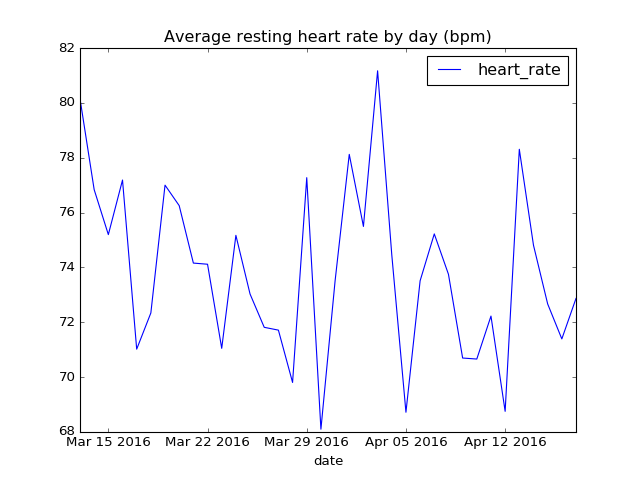

In [7]:
heart_rate_nonactive_by_day.plot(kind='line', title="Average resting heart rate by day (bpm)")

<IPython.core.display.Javascript object>


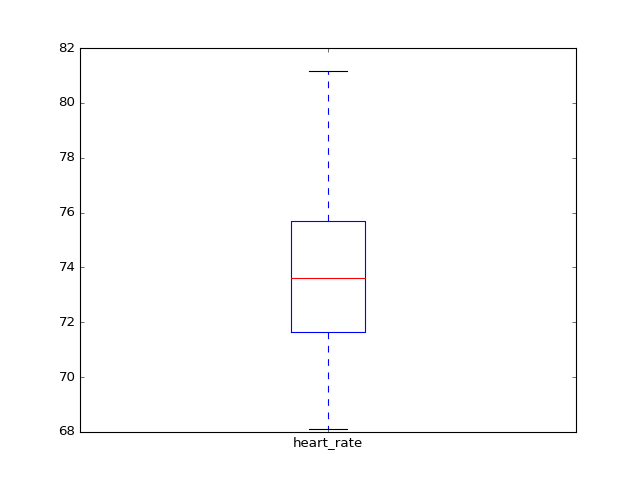

In [17]:
heart_rate_nonactive_by_day.plot(kind='box')

In [15]:
avg_heart_rate = heart_rate_nonactive_by_day['heart_rate'].mean()
print("My average resting heart rate was {} bpm".format(avg_heart_rate))

My average resting heart rate was 73.84904481309323 bpm


## Total coffee consumption by day

In [8]:
coffee_consumption_by_day = coffee_consumption.groupby('date').sum()
coffee_consumption_by_day

,amount
date,
2016-03-13,32
2016-03-14,32
2016-03-15,36
2016-03-16,36
2016-03-17,36
2016-03-18,28
2016-03-19,32
2016-03-20,44
2016-03-21,36


In [21]:
coffee_consumption_by_day.sort(['amount'])

/Users/ghing/venvs/coffee-science-fair-data/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,amount
date,
2016-03-28,12
2016-04-04,16
2016-03-22,16
2016-03-24,20
2016-04-05,24
2016-03-27,28
2016-03-25,28
2016-03-23,28
2016-04-18,28


<IPython.core.display.Javascript object>


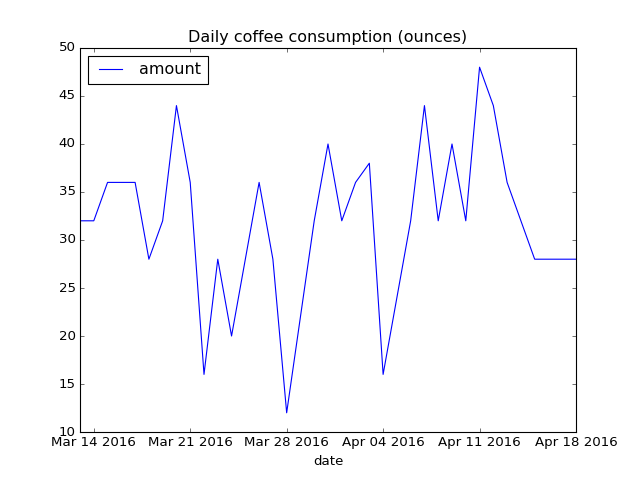

In [20]:
coffee_plot = coffee_consumption_by_day.plot(kind='line', title="Daily coffee consumption (ounces)")

<IPython.core.display.Javascript object>


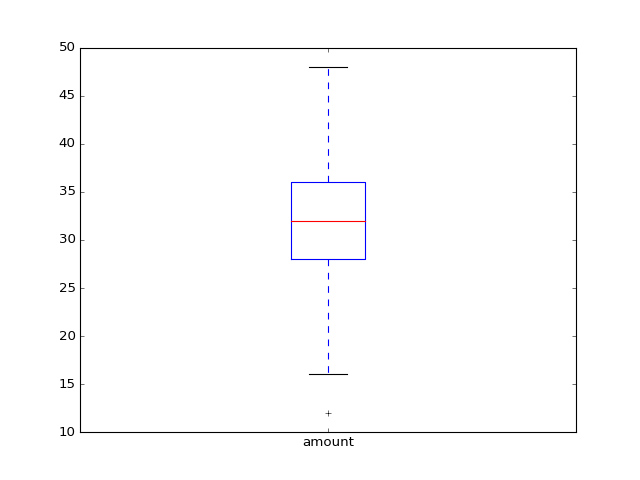

In [19]:
coffee_consumption_by_day.plot(kind='box')

## How does my daily coffee consumption compare with the national average?

In [10]:
avg_daily_coffee_consumption = coffee_consumption_by_day['amount'].mean()
print("On average, I drink {0} ounces of coffee a day".format(avg_daily_coffee_consumption))

On average, I drink 31.944444444444443 ounces of coffee a day


This is slightly more than the national average of 27.9 ounces a day ([from a 2010 study by the National Coffee Association](http://www.hsph.harvard.edu/news/multimedia-article/facts/)).

## Join together the daily average heart rate and coffee data

In [11]:
coffee_and_heart_rate = pd.merge(heart_rate_nonactive_by_day, coffee_consumption_by_day, left_index=True, right_index=True)
coffee_and_heart_rate

,heart_rate,amount
date,,
2016-03-13,80.150000,32
2016-03-14,76.835749,32
2016-03-15,75.196970,36
2016-03-16,77.186441,36
2016-03-17,71.020548,36
2016-03-18,72.341146,28
2016-03-19,77.000000,32
2016-03-20,76.252652,44
2016-03-21,74.158730,36


## Let's see if there's a correlation between coffee consumption and heart rate

<IPython.core.display.Javascript object>


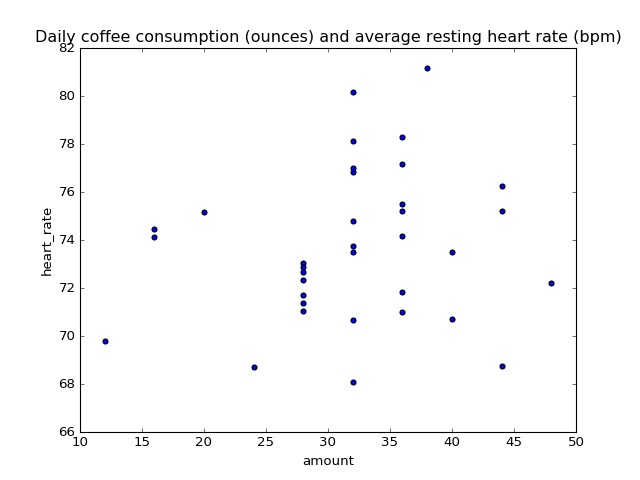

In [12]:
coffee_and_heart_rate.plot(kind='scatter', x='amount', y='heart_rate', title="Daily coffee consumption (ounces) and average resting heart rate (bpm)")

## Conclusion

Drinking more coffee doesn’t seem to consistently correlate to higher average heart rates. Days when I drank less coffee tended to result in lower heart rates, but similar heart rates were recorded on days with higher coffee consumption. When drinking the average amount of coffee, around 32 ounces, heart rates varied widely.

## More questions

### Does coffee make stressful days more stressful?

I didn't record how stressed or not stressed I felt each day.  If I did this, I could see if I had a higher heart rate on days where I felt more stressed and whether drinking more coffee on these days had a more profound effect on heart rate than on days where I didn't feel stressed.

### How does coffee affect sleep?

The activity tracker also records sleep, probably by [measuring times when there is little movement](https://exist.io/blog/fitness-tracker-sleep/). 

### Is the effect on heart rate greater closer to when I drank coffee?

### Does the spacing of coffee drinking affect the average heart rate?
